In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from main.alpaca import *
from main.dataset import *
from main.dataViz import *
from hand_plotting import *
import yaml

In [91]:
cfg_filename = 'configs/trajectory-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [92]:
config

{'data_horizon': 20,
 'test_horizon': 10,
 'row_length': 30,
 'meta_batch_size': 128,
 'x_dim': 567,
 'y_dim': 63,
 'sigma_eps': 0.005,
 'lr': 0.0001,
 'nn_layers': [256, 256, 256],
 'activation': 'tanh',
 'basis': 'lstm',
 'num_input_points': 10,
 'num_hand_points': 21,
 'input_dim': 3,
 'shuffle': False,
 'action': 'train-set',
 'formulation': 'space'}

In [93]:
root_dir_train = '/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/train/'
root_dir_val = '/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/val/'
root_dir_test = '/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/test/'
action_label = config['action']
basis = config['basis']
num_input_points = config['num_input_points']
num_hand_points = config['num_hand_points']
input_dim = config['input_dim']
row_length = config['row_length']
shuffle = config['shuffle']
train_dataset = HandTrajectoryDataset(root_dir_train, action_label, basis, num_input_points, num_hand_points, input_dim, row_length, shuffle)
val_dataset = HandTrajectoryDataset(root_dir_val, action_label, basis, num_input_points, num_hand_points, input_dim, row_length, shuffle)
test_dataset = HandTrajectoryDataset(root_dir_test, action_label, basis, num_input_points, num_hand_points, input_dim, row_length, shuffle)

In [17]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(device_count = {'GPU': 0}, allow_soft_placement=True, log_device_placement=True), graph=g1)
agent1 = ALPaCA(config, sess1, g1)
agent1.construct_model()
agent1.train(train_dataset, val_dataset, 2000)

loss: 228.7528
val_loss:  169.26974
Saved to: checkpoints/space_1547396405.1178076_action=train-set_basis=mlp_nn-layers=256-256-256_activation=tanh_lr=0.0001_sigma-eps=0.005_batch-size=128_num-input-points=10_data-horizon=20_test-horizon=10_row-length=30-0
loss: 182.8825
val_loss:  149.9516
loss: 149.75478
val_loss:  175.08615
loss: 150.51741
val_loss:  96.85702
loss: 152.72012
val_loss:  120.597374
loss: 156.19838
val_loss:  152.44609
loss: 142.71288
val_loss:  138.97476
loss: 151.42912
val_loss:  107.68406
loss: 134.17729
val_loss:  136.647
loss: 147.59752
val_loss:  146.60916
loss: 139.89711
val_loss:  132.31047
loss: 130.08237
val_loss:  112.13035
loss: 133.00511
val_loss:  116.88265
loss: 142.49268
val_loss:  96.04897
loss: 141.725
val_loss:  126.71107
loss: 159.30264
val_loss:  100.57197
loss: 157.02858
val_loss:  145.32314
loss: 133.3853
val_loss:  129.72864
loss: 139.7774
val_loss:  112.48837
loss: 150.41426
val_loss:  91.03193
loss: 159.14023
val_loss:  138.97578
Saved to: che

In [94]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(device_count = {'GPU': 0}, allow_soft_placement=True, log_device_placement=True), graph=g1)
agent1 = ALPaCA(config, sess1, g1)
# Make sure the constructed model and the checkpoint model match
agent1.construct_model() 
agent1.restore('checkpoints/space_1547319403.4266696_action=train-set_basis=lstm_nn-layers=256-256-256_activation=tanh_lr=0.0001_sigma-eps=0.005_batch-size=128_num-input-points=10_data-horizon=20_test-horizon=10_row-length=30-1999')

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from checkpoints/space_1547319403.4266696_action=train-set_basis=lstm_nn-layers=256-256-256_activation=tanh_lr=0.0001_sigma-eps=0.005_batch-size=128_num-input-points=10_data-horizon=20_test-horizon=10_row-length=30-1999
Restored model from: checkpoints/space_1547319403.4266696_action=train-set_basis=lstm_nn-layers=256-256-256_activation=tanh_lr=0.0001_sigma-eps=0.005_batch-size=128_num-input-points=10_data-horizon=20_test-horizon=10_row-length=30-1999


In [107]:
# Note that the number of rows in x_test, y_test, and init_test may not be n_funcs
# since each sampled function may be 0 or more than 1 rows
x_test, y_test, init_test = test_dataset.sample(3, 100, return_init=True)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)
print('init_test shape', init_test.shape)

n_funcs: 3
i: 0
x_array shape (1, 30, 567)
x_matrix shape (1, 30, 567)
i: 1
x_array shape (2, 30, 567)
x_matrix shape (3, 30, 567)
i: 2
x_array shape (1, 30, 567)
x_matrix shape (4, 30, 567)

x_test shape (4, 30, 567)
y_test shape (4, 30, 63)
init_test shape (4, 30, 63)


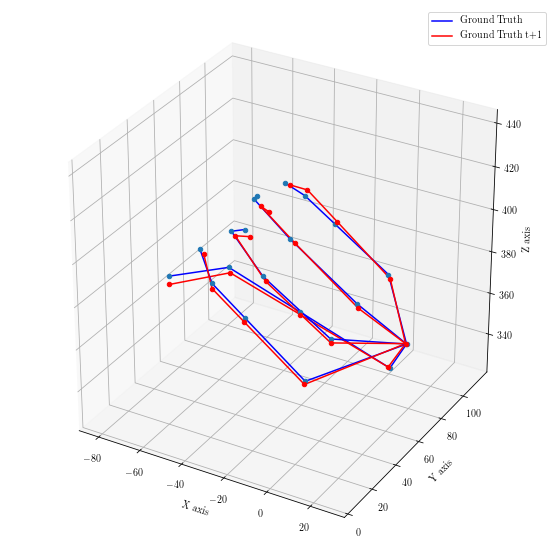

In [109]:
# Testing plotting code
hand1 = np.squeeze(init_test[0,0,:])
hand2 = hand1 + np.squeeze(x_test[0,0,63:126])
plot_hand_points(hand1)
plot_two_hands2(hand1, hand2, first_hand_label='Ground Truth', second_hand_label='Ground Truth t+1')

x_test shape (4, 30, 567)
y_test shape (4, 30, 63)
next_positions shape (30, 63)


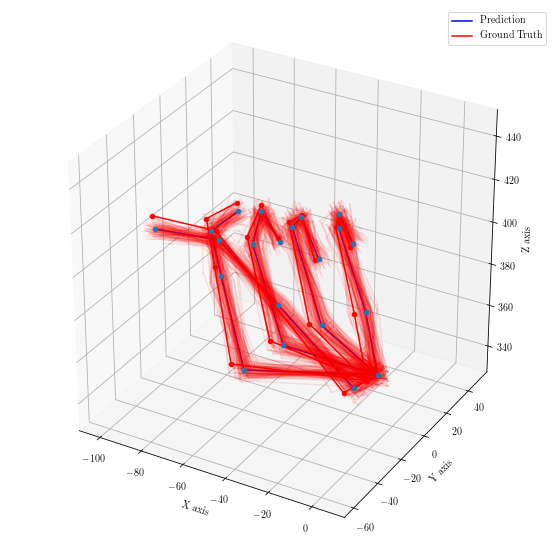

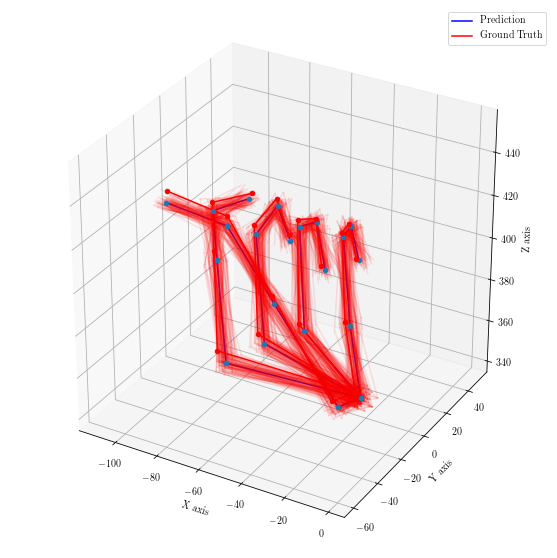

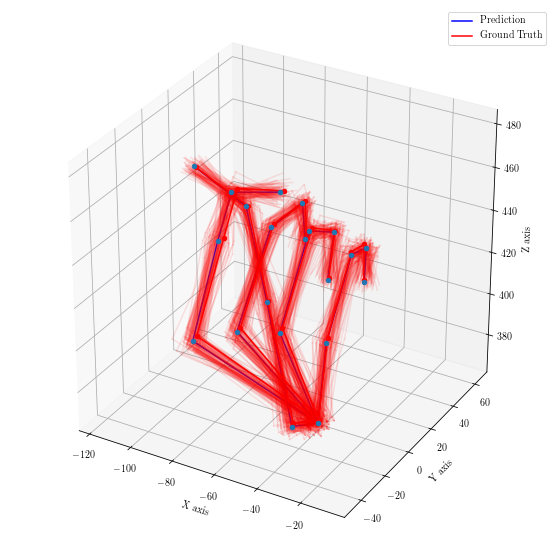

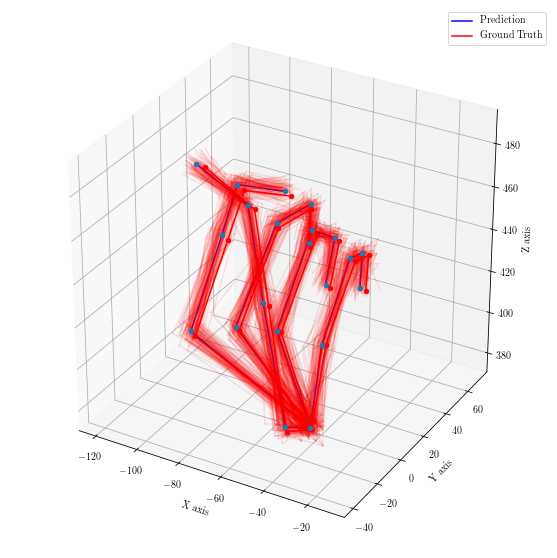

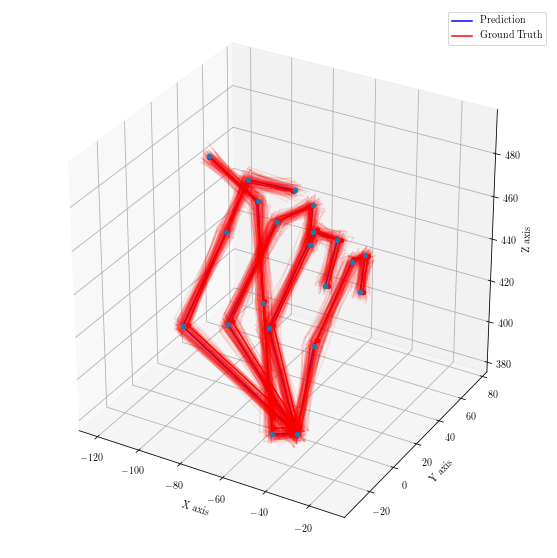

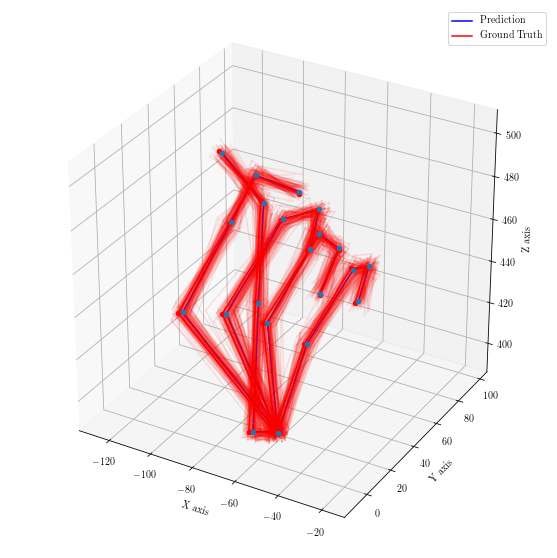

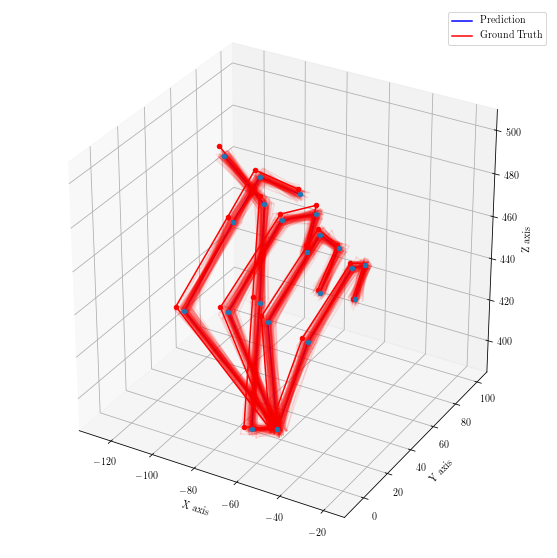

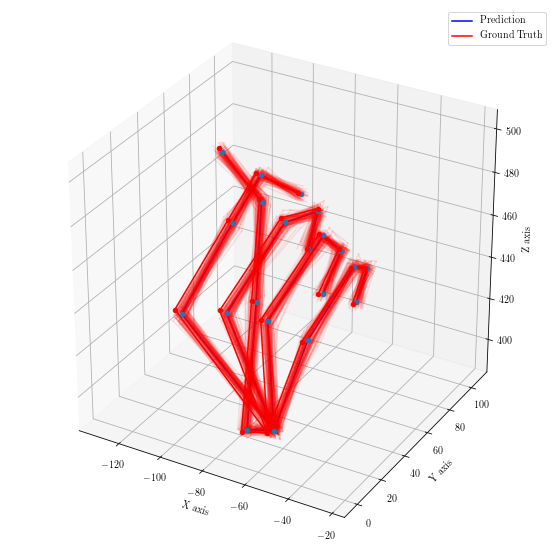

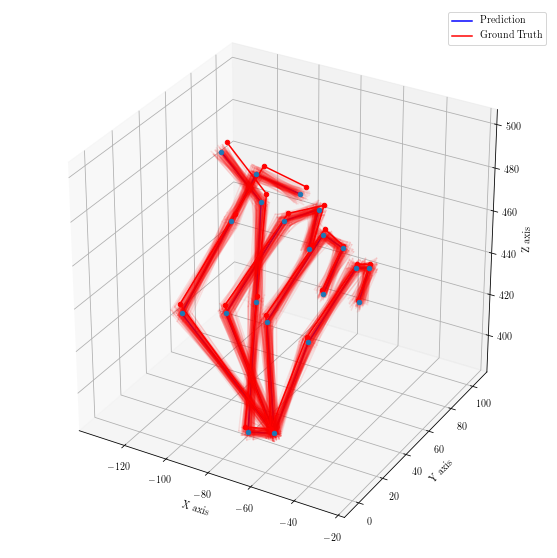

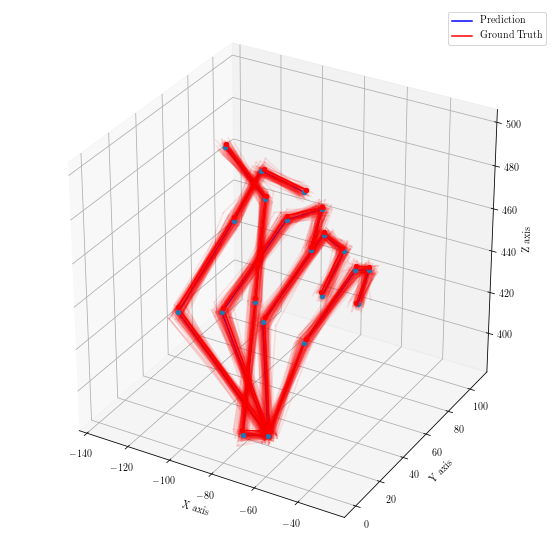

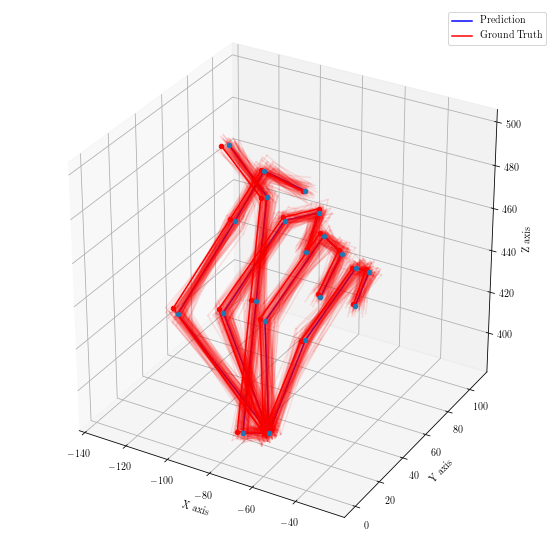

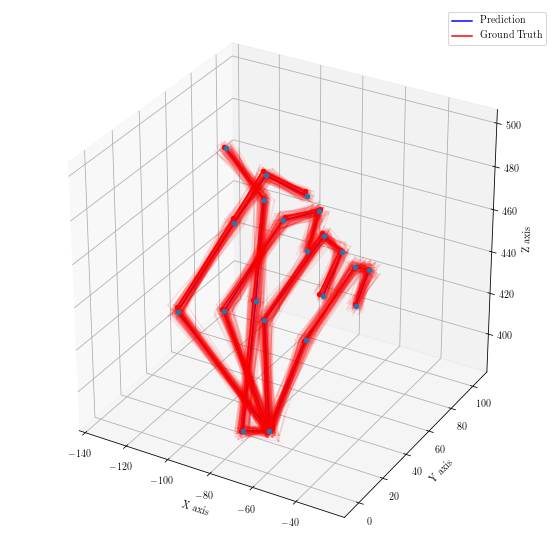

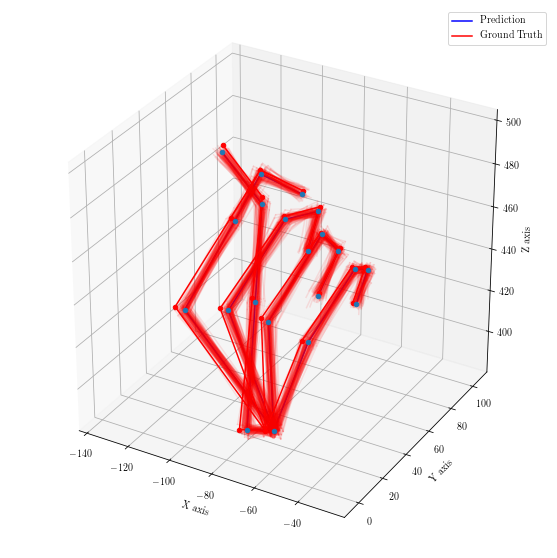

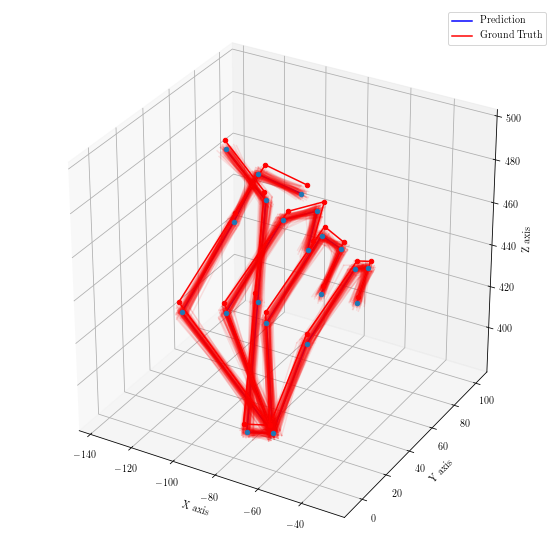

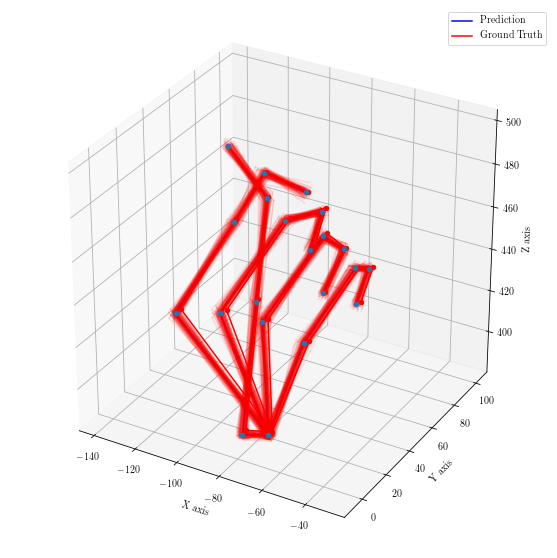

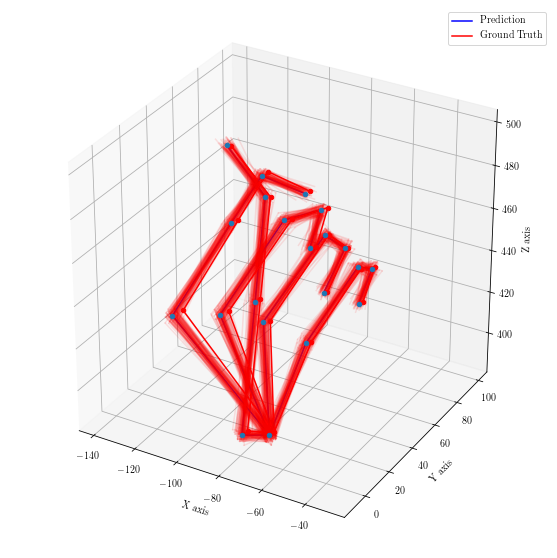

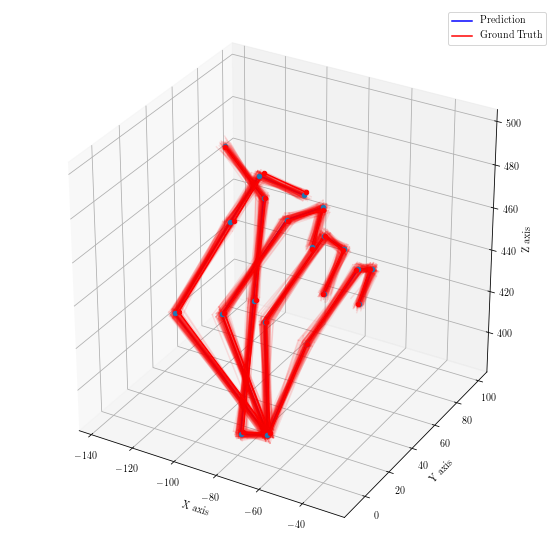

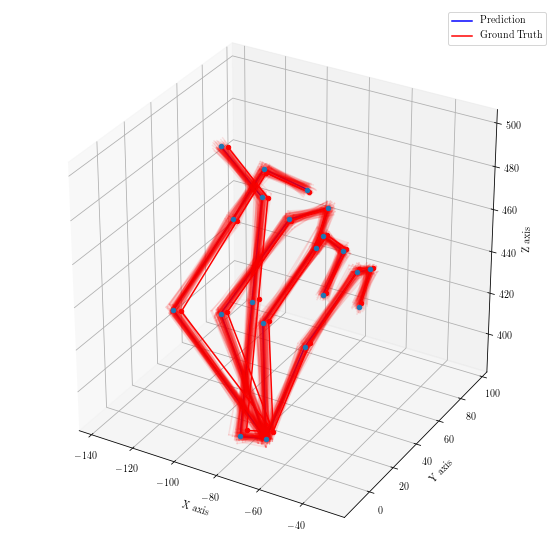

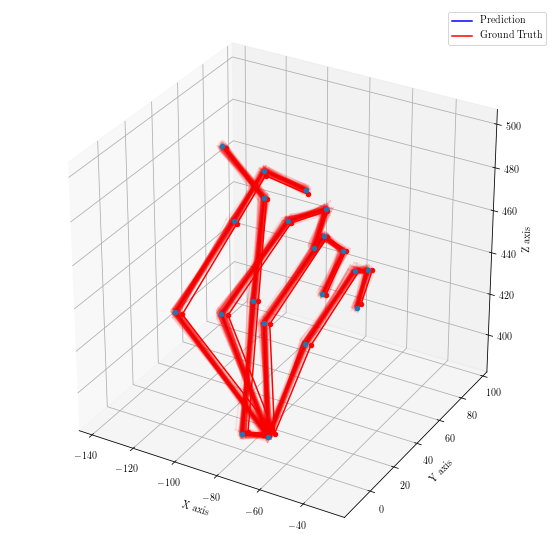

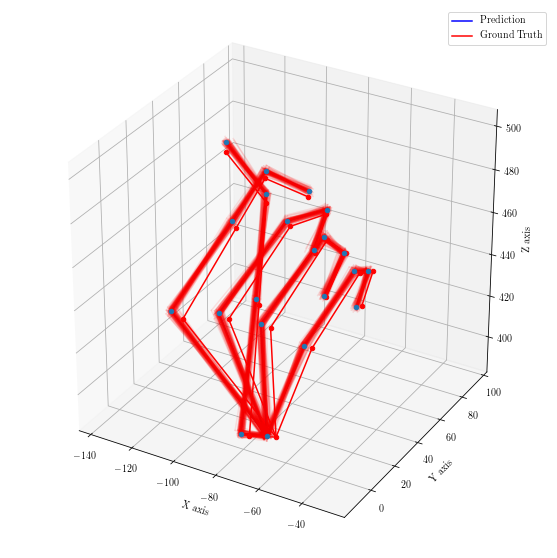

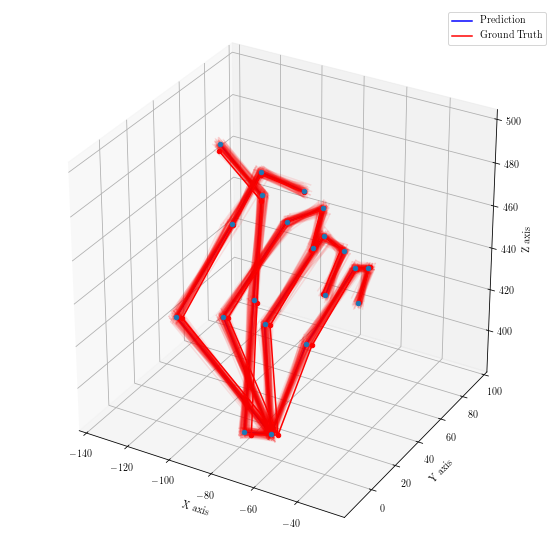

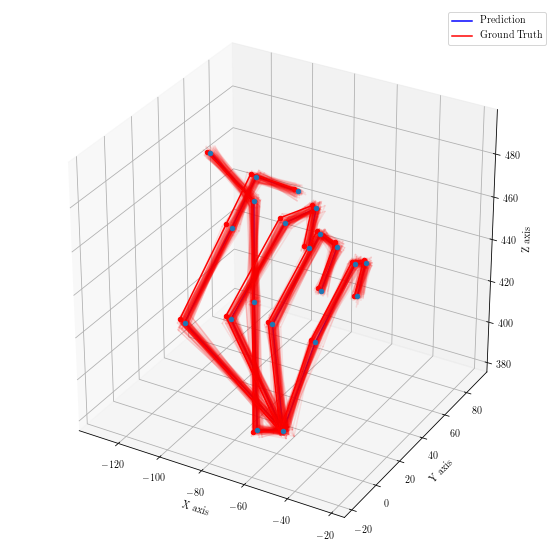

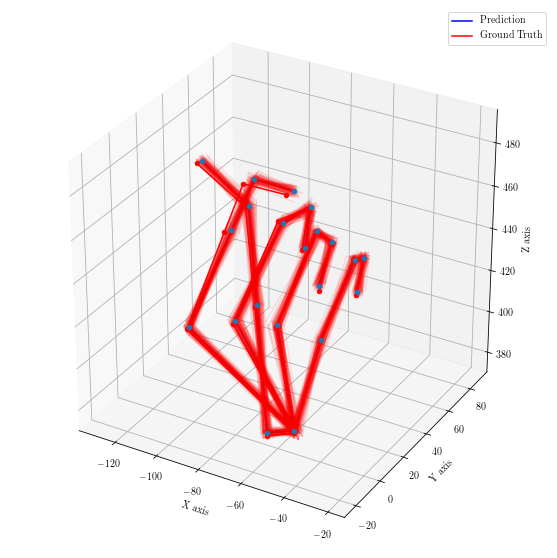

In [128]:
next_positions = init_test[0,:,:] # Just use the first trajectory sampled
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)
print('next_positions shape', next_positions.shape)

# Predicting 1 next step at a time
for i in range(1, row_length):
    x_c = x_test[0, :i-1, :]
    y_c = y_test[0, :i-1, :]
    x = x_test[0, i, :]
    x_c = np.expand_dims(x_c, axis=0)
    y_c = np.expand_dims(y_c, axis=0)
    x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
    y, s = agent1.test(x_c, y_c, x) # y is the predicted next position
    
    next_pos = next_positions[i,:]
    for j in range(num_input_points - 1):
        next_pos = next_pos + np.squeeze(x[:,:,63*j:63*(j+1)])
        
    pred_hand = next_pos + np.squeeze(y)
    true_hand = next_pos + y_test[0, i, :]
    plot_two_hands2(pred_hand, true_hand, pred_uncertainty=s)

x_test shape (4, 30, 567)
y_test shape (4, 30, 63)
next_positions shape (30, 63)


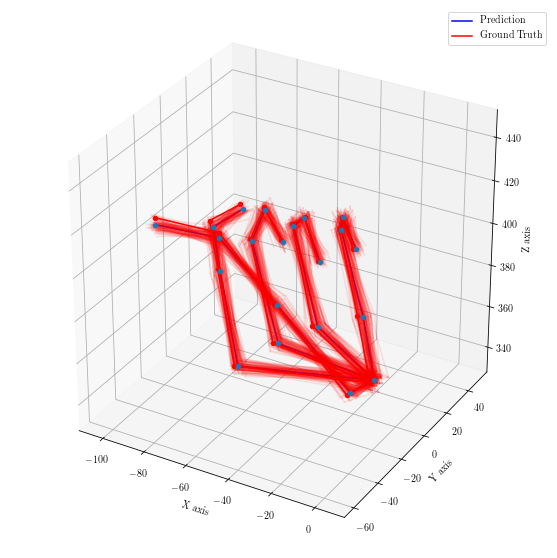

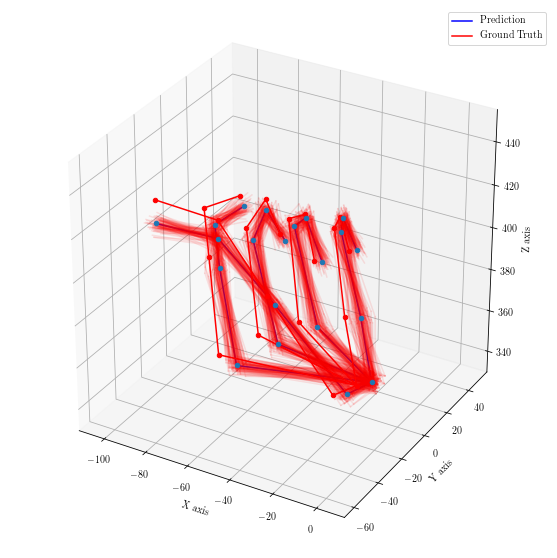

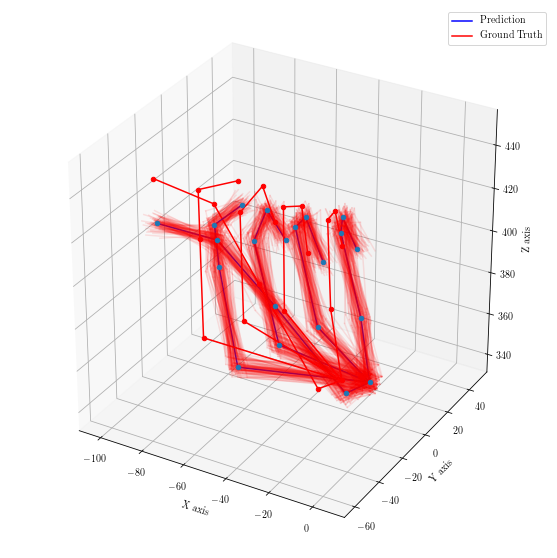

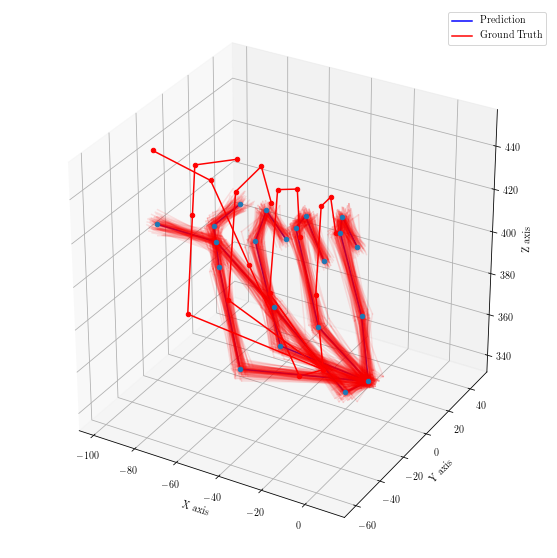

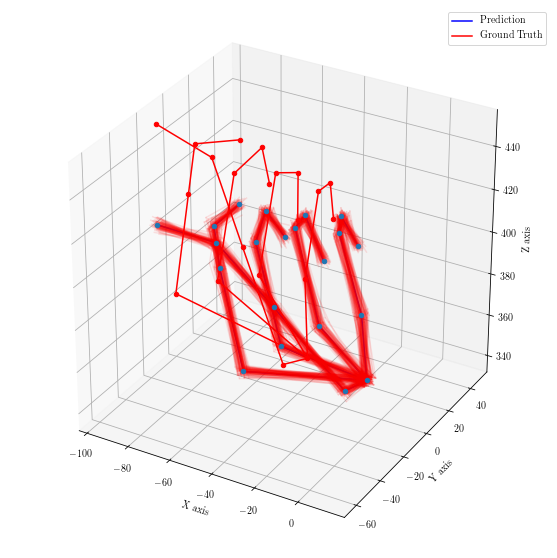

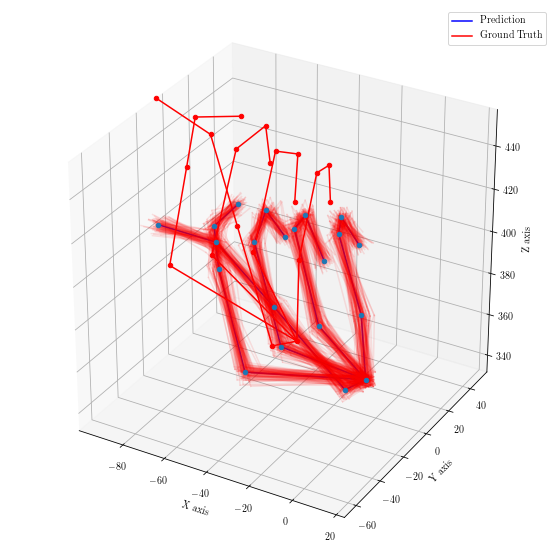

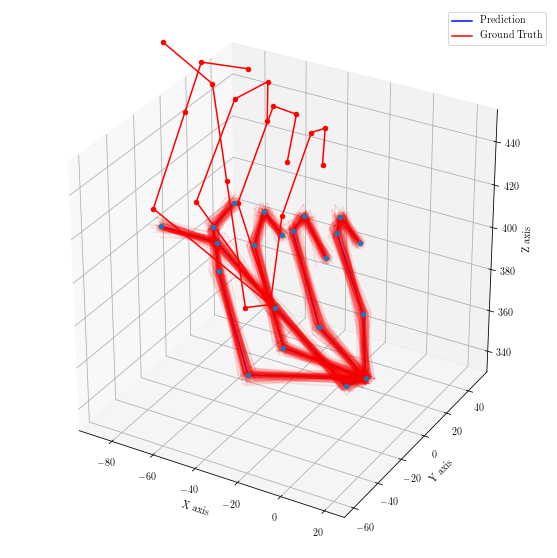

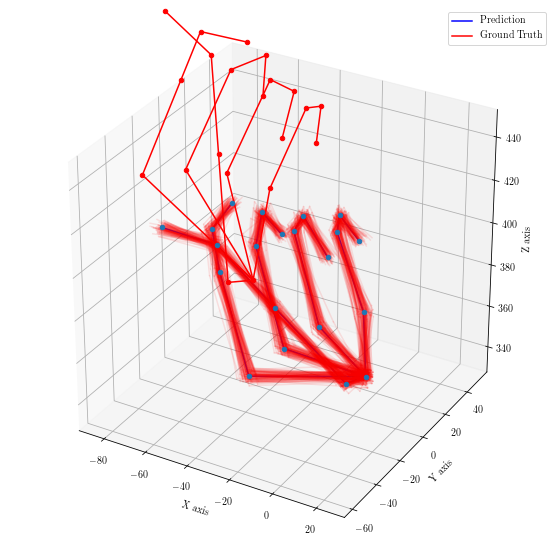

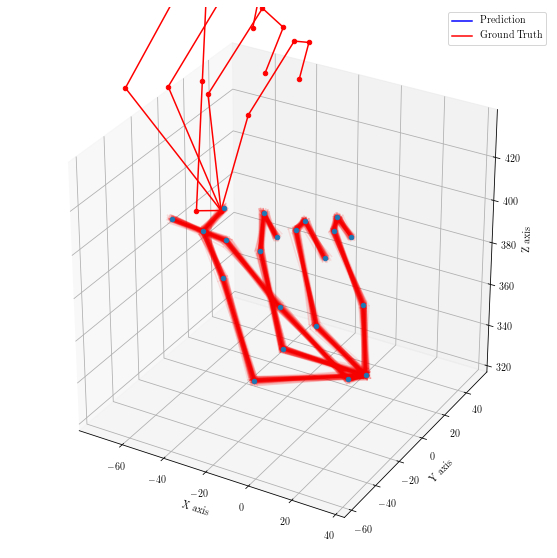

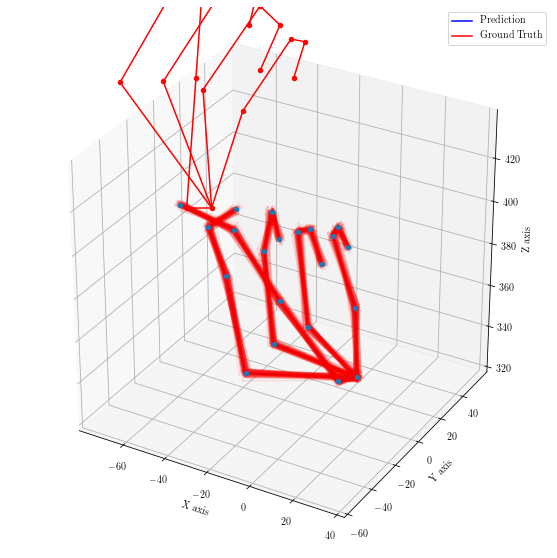

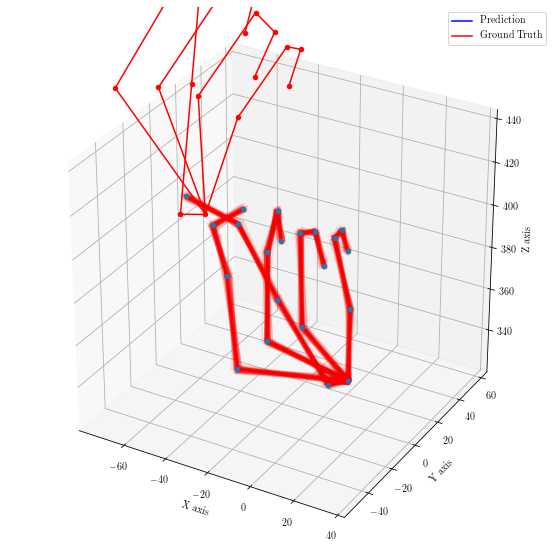

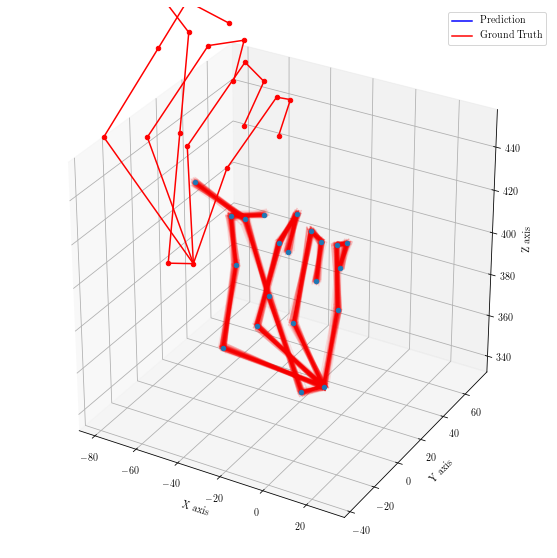

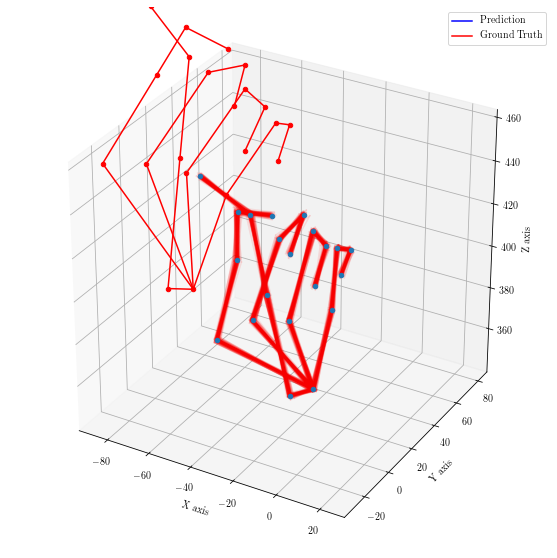

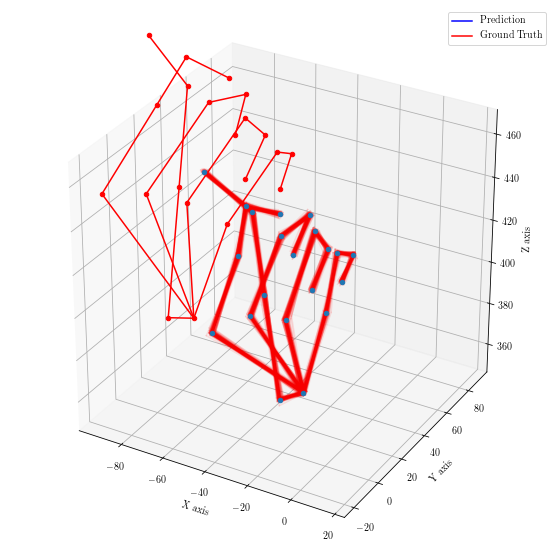

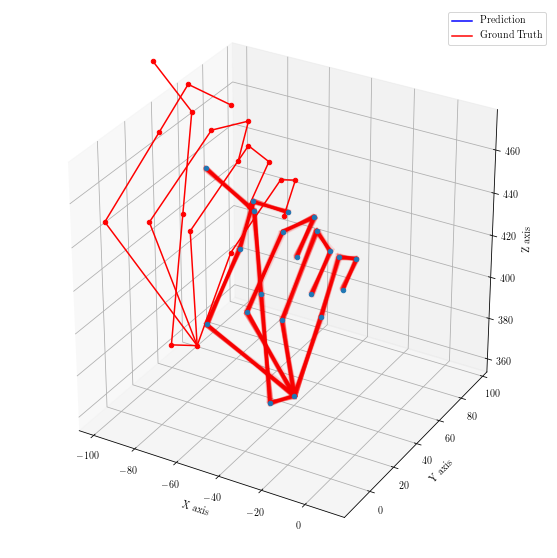

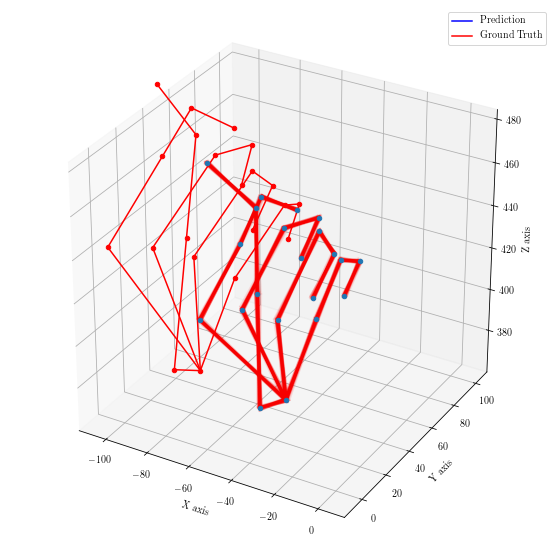

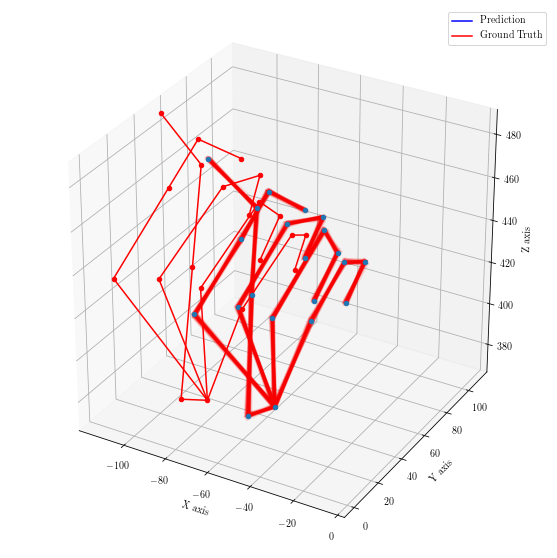

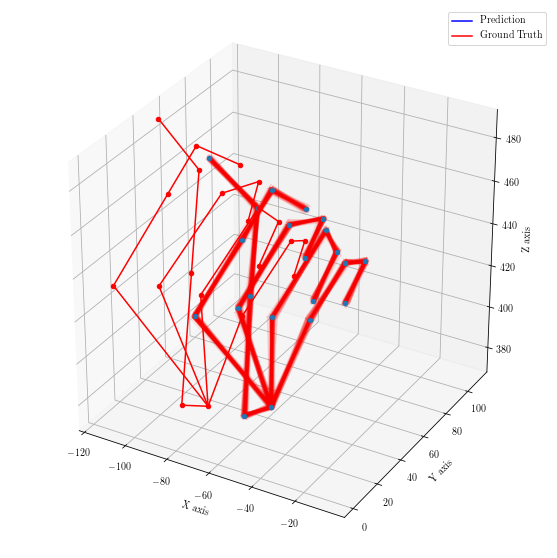

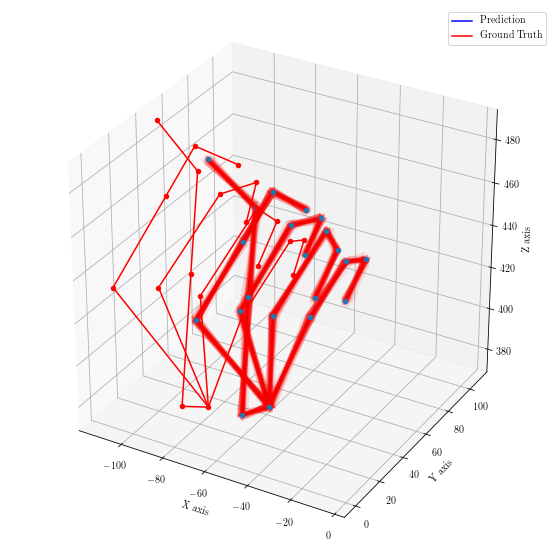

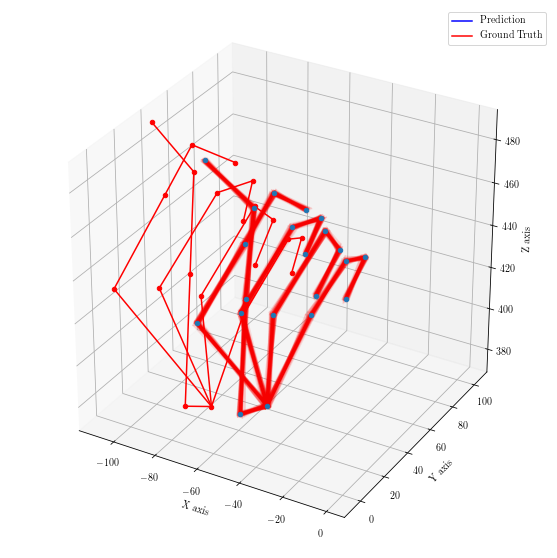

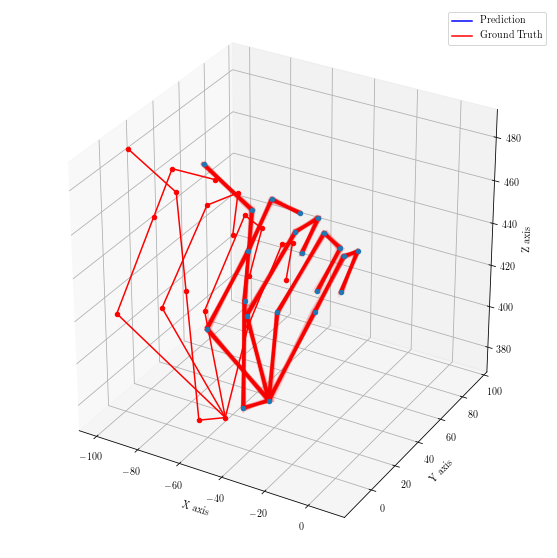

In [129]:
next_positions = init_test[0,:,:] # Just use the first trajectory sampled
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)
print('next_positions shape', next_positions.shape)

# Predicting farther into the future
x_c = x_test[0, :1, :]
y_c = y_test[0, :1, :]
x = x_test[0, 1, :]
x_c = np.expand_dims(x_c, axis=0)
y_c = np.expand_dims(y_c, axis=0)
x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
    
for i in range(1, row_length):
    y, s = agent1.test(x_c, y_c, x) # y is the predicted next position
    
    next_pos_pred = next_positions[i,:]
    for j in range(num_input_points - 1):
        next_pos_pred = next_pos_pred + np.squeeze(x[:,:,63*j:63*(j+1)])
    pred_hand = next_pos_pred + np.squeeze(y)
    
    next_pos_true = next_positions[i,:]
    for k in range(num_input_points - 1):
        next_pos_true = next_pos_true + np.squeeze(x_test[0,i,63*k:63*(k+1)])
    true_hand = next_pos_true + y_test[0, i, :]
    
    plot_two_hands2(pred_hand, true_hand, pred_uncertainty=s)
    
    x_c = np.concatenate((x_c, x), axis=1)
    y_c = np.concatenate((y_c, y), axis=1)
    x = np.concatenate((x[:,:,63:], y), axis=2)

In [ ]:
num_input_points = config['num_input_points']
num_hand_points = config['num_hand_points']
input_dim = config['input_dim']
shuffle = config['shuffle']
row_length = config['row_length']
action_label = config['action']
train_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/train/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)
val_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/valid/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)
test_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/test/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)

len_train_dataset = train_dataset.__len__()
num_samples_train = len_train_dataset
Y1, X1, init1 = train_dataset.sample_trajectories(num_samples_train)
Y2, X2, init2 = train_dataset.sample_trajectories(num_samples_train)
print('Y1 size', Y1.shape)
print('X1 size', X1.shape)
print('init1 size', init1.shape)
print('Y2 size', Y2.shape)
print('X2 size', X2.shape)
print('init2 size', init2.shape)
print()

len_val_dataset = val_dataset.__len__()
num_samples_val = len_val_dataset
Y_val1, X_val1, init_val1 = val_dataset.sample_trajectories(num_samples_val)
Y_val2, X_val2, init_val2 = val_dataset.sample_trajectories(num_samples_val)
print('Y_val1 size', Y_val1.shape)
print('X_val1 size', X_val1.shape)
print('init_val1 size', init_val1.shape)
print('Y_val2 size', Y_val2.shape)
print('X_val2 size', X_val2.shape)
print('init_val2 size', init_val2.shape)
print()

len_test_dataset = test_dataset.__len__()
num_samples_test = len_test_dataset
Y_test1, X_test1, init_test1 = test_dataset.sample_trajectories(num_samples_test)
Y_test2, X_test2, init_test2 = test_dataset.sample_trajectories(num_samples_test)
print('Y_test1 size', Y_test1.shape)
print('X_test1 size', X_test1.shape)
print('init_test1 size', init_test1.shape)
print('Y_test2 size', Y_test2.shape)
print('X_test2 size', X_test2.shape)
print('init_test2 size', init_test2.shape)

noise1 = 0.1
noise2 = 0.3
noise3 = 0.5

In [ ]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(device_count = {'GPU': 0}, allow_soft_placement=True, log_device_placement=True), graph=g1)
agent1 = ALPaCA(config, sess1, g1)
agent1.construct_model()
agent1.train(train_dataset, 500)

In [ ]:
rmse = agent1.test_rmse(sess1, X1, Y1)
print('Train RMSE:', rmse)

rmse = agent1.test_rmse(sess1, X_test1, Y_test1)
print('Test RMSE:', rmse)

In [ ]:
# Testing plotting code
print(Y_test1.shape)
print(X_test1.shape)
print(init_test1.shape)

plot_hand_points(init_test1[0, 0, :])
plot_hand_points(init_test1[0, 1, :])
hand1 = np.squeeze(X_test1[0, 0, 0:63]) + init_test1[0, 0, :]
hand2 = hand1 + np.squeeze(X_test1[0, 0, 63:126])
plot_two_hands(hand1, hand2, first_hand_label='Ground Truth', second_hand_label='Ground Truth t+1')

In [ ]:
x_test = X_test1[0,:,:];
y_test = Y_test1[0,:,:];
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

next_positions = init_test1[0,:,:]
print('next_positions shape', next_positions.shape)

# Predicting 1 next step at a time
for i in range(1, 10):
    ux = x_test[:i, :]
    ux = np.expand_dims(ux, axis=0)
    uy = y_test[:i, :]
    uy = np.expand_dims(uy, axis=0)
    x = x_test[i, :]
    x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
    y, s = agent1.test(sess1, ux, uy, x) # y is the predicted next position
    
    next_pos = next_positions[i,:]
    for j in range(num_input_points - 1):
        next_pos = next_pos + np.squeeze(x[:,:,63*j:63*(j+1)])
        
    pred_hand = next_pos + np.squeeze(y)
    true_hand = next_pos + y_test[i, :]
    plot_two_hands(pred_hand, true_hand, pred_uncertainty=s)

In [ ]:
ux = X_test1[0,0,:]
uy = Y_test1[0,0,:]
ux = np.expand_dims(np.expand_dims(ux, axis=0), axis=0)
uy = np.expand_dims(np.expand_dims(uy, axis=0), axis=0)
x = X_test1[0,1,:]
x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
print('ux shape', ux.shape)
print('uy shape', uy.shape)
print('x shape', x.shape)

print('X_test1 shape', X_test1.shape)
print('Y_test1 shape', Y_test1.shape)

next_positions = init_test1[0,:,:]
print('next_positions shape', next_positions.shape)

# Predicting farther into the future
for i in range(1, 10):
    y, s = agent1.test(sess1, ux, uy, x) # y is the predicted next position
    
    next_pos_pred = next_positions[i,:]
    for j in range(num_input_points - 1):
        next_pos_pred = next_pos_pred + np.squeeze(x[:,:,63*j:63*(j+1)])
    pred_hand = next_pos_pred + np.squeeze(y)
    
    next_pos_true = next_positions[i,:]
    for k in range(num_input_points - 1):
        next_pos_true = next_pos_true + np.squeeze(X_test1[0,i,63*k:63*(k+1)])
    true_hand = next_pos_true + Y_test1[0, i, :]
    
    plot_two_hands(pred_hand, true_hand, pred_uncertainty=s)
    
    ux = np.concatenate((ux, x), axis=1)
    uy = np.concatenate((uy, y), axis=1)
    x = np.concatenate((x[:,:,63:], y), axis=2)

In [ ]:
points_per_traj = 30
yy, xx = train_dataset.sample_trajectories_time(num_samples_train, points_per_traj)
# xx = np.expand_dims(xx, axis=2)
yy_val, xx_val = val_dataset.sample_trajectories_time(num_samples_val, points_per_traj)
# xx_val = np.expand_dims(xx_val, axis=2)
yy_test, xx_test = test_dataset.sample_trajectories_time(num_samples_test, points_per_traj)
# xx_test = np.expand_dims(xx_test, axis=2)

print(len(xx))
print(len(yy))
print(len(xx_val))
print(len(yy_val))
print(len(xx_test))
print(len(yy_test))

print(xx[0].shape)
print(yy[0].shape)

# print('xx shape', xx.shape)
# print('yy shape', yy.shape)
# print('xx_val shape', xx_val.shape)
# print('yy_val shape', yy_val.shape)
# print('xx_test shape', xx_test.shape)
# print('yy_test shape', yy_test.shape)

In [ ]:
g2 = tf.Graph()
sess2 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent2 = ALPaCA(config)
agent2.sigma_scalar = noise2
agent2.construct_model(sess2, g2)
agent2.train(sess2, yy, xx, yy_val, xx_val, 200, plot_loss=True)

In [ ]:
rmse = agent2.test_rmse(sess2, xx, yy)
print('Train RMSE:', rmse)

rmse = agent2.test_rmse(sess2, xx_test, yy_test)
print('Test RMSE:', rmse)